In [1]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline        

import numpy as np
import pandas as pd 

from sklearn.datasets import make_circles, load_boston
from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
corpus = ['python','es', 'es','un','lenguaje','lenguaje','de', 'programacion']

In [3]:
vecto = CountVectorizer()

In [8]:
vecto = CountVectorizer()

x = vecto.fit_transform(corpus)
print(vecto.get_feature_names())

['de', 'es', 'lenguaje', 'programacion', 'python', 'un']


In [11]:
x.toarray()

array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0]], dtype=int64)

In [12]:
from sklearn import preprocessing

In [13]:
en = preprocessing.LabelEncoder()

In [14]:
en.fit(['alto','bajo','alto','medio','muy alto','bajo','muy alto'])

LabelEncoder()

In [16]:
en.classes_

array(['alto', 'bajo', 'medio', 'muy alto'], dtype='<U8')

In [17]:
en.transform(['medio','muy alto','alto','bajo'])

array([2, 3, 0, 1], dtype=int64)

In [20]:
pd.get_dummies(['medio','muy alto','alto','bajo','alto','alto'])

,alto,bajo,medio,muy alto
0,0,0,1,0
1,0,0,0,1
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0
5,1,0,0,0


In [21]:
en.inverse_transform([3,3,1,0,2])

array(['muy alto', 'muy alto', 'bajo', 'alto', 'medio'], dtype='<U8')

In [22]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
titanic.fillna(0, inplace = True)

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [28]:
trans = ColumnTransformer(
[('one_hot',OneHotEncoder(),[4]),
('norm', StandardScaler(),[9])])

In [29]:
pd.DataFrame(trans.fit_transform(titanic))

,0,1,2
0,0.0,1.0,-0.502445
1,1.0,0.0,0.786845
2,1.0,0.0,-0.488854
3,1.0,0.0,0.420730
4,0.0,1.0,-0.486337
...,...,...,...
886,0.0,1.0,-0.386671
887,1.0,0.0,-0.044381
888,1.0,0.0,-0.176263
889,0.0,1.0,-0.044381


In [30]:
one = OneHotEncoder()

In [36]:
trans_one = one.fit_transform(titanic['Sex'].values.reshape((-1,1)))

In [37]:
trans_one.toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [38]:
import zipfile

In [39]:
zf = zipfile.ZipFile('data/mahindra.zip')

In [42]:
zf.infolist()

[<ZipInfo filename='test.csv' compress_type=deflate file_size=37911676 compress_size=10878355>]

In [43]:
ctr = pd.read_csv(zf.open('test.csv'))

In [44]:
ctr

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,05/04/18,05/04/18,06/04/18,3,2,2,0,45,3,...,2.0,2.0,3,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,A,C,9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739...
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,24/05/15,23/06/15,27/06/15,1,2,4,0,45,1,...,2.0,2.0,4,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,21/07/15,07/08/15,10/08/15,3,2,3,0,45,2,...,4.0,2.0,2,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,31/07/15,22/10/15,25/10/15,1,2,3,0,45,1,...,2.0,2.0,6,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,01/07/16,01/10/16,05/10/16,1,2,4,0,45,1,...,2.0,2.0,11,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146760,05212a11e703121c0ef8f85b4f7311d0dfc995dee62a9c...,20/02/19,21/02/19,22/02/19,1,3,2,0,47,1,...,4.0,10.0,1,2,E,1,6edc9c8326fcd1aca26a04881cab372c78d45ad03e030f...,E,A,48449a14a4ff7d79bb7a1b6f3d488eba397c36ef25634c...
146761,a43dd948e3bd01e289e8c6ef93a40b512876969e967353...,21/02/19,21/02/19,22/02/19,3,4,3,0,45,2,...,3.0,13.0,2,4,B,1,fe80baa3a22f9c18752cc61e21adeb571af20fa024936b...,D,A,6208ef0f7750c111548cf90b6ea1d0d0a66f6bff40dbef...
146762,ed7c7ab2ff18b02e5bb10a99e6883d1529171fa330029a...,23/02/19,24/02/19,26/02/19,1,1,5,0,45,1,...,4.0,3.0,6,3,F,1,f67091b6777e2cd823b8e802f21f76c615364fc7043b14...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...
146763,381d17a0a2d8912650092cbd5e0b16a4f93b6d0fd7d174...,26/02/19,01/03/19,02/03/19,1,7,2,2,4995,3,...,3.0,5.0,3,4,I,1,cf94bdd8203a1569976809d8ee093816272c1649b32fc3...,A,A,3e1e967e9b793e908f8eae83c74dba9bcccce6a5535b4b...


In [45]:
ctr2 = pd.read_csv('data/mahindra.zip')

In [46]:
ctr2

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,05/04/18,05/04/18,06/04/18,3,2,2,0,45,3,...,2.0,2.0,3,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,A,C,9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739...
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,24/05/15,23/06/15,27/06/15,1,2,4,0,45,1,...,2.0,2.0,4,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,21/07/15,07/08/15,10/08/15,3,2,3,0,45,2,...,4.0,2.0,2,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,31/07/15,22/10/15,25/10/15,1,2,3,0,45,1,...,2.0,2.0,6,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,01/07/16,01/10/16,05/10/16,1,2,4,0,45,1,...,2.0,2.0,11,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146760,05212a11e703121c0ef8f85b4f7311d0dfc995dee62a9c...,20/02/19,21/02/19,22/02/19,1,3,2,0,47,1,...,4.0,10.0,1,2,E,1,6edc9c8326fcd1aca26a04881cab372c78d45ad03e030f...,E,A,48449a14a4ff7d79bb7a1b6f3d488eba397c36ef25634c...
146761,a43dd948e3bd01e289e8c6ef93a40b512876969e967353...,21/02/19,21/02/19,22/02/19,3,4,3,0,45,2,...,3.0,13.0,2,4,B,1,fe80baa3a22f9c18752cc61e21adeb571af20fa024936b...,D,A,6208ef0f7750c111548cf90b6ea1d0d0a66f6bff40dbef...
146762,ed7c7ab2ff18b02e5bb10a99e6883d1529171fa330029a...,23/02/19,24/02/19,26/02/19,1,1,5,0,45,1,...,4.0,3.0,6,3,F,1,f67091b6777e2cd823b8e802f21f76c615364fc7043b14...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...
146763,381d17a0a2d8912650092cbd5e0b16a4f93b6d0fd7d174...,26/02/19,01/03/19,02/03/19,1,7,2,2,4995,3,...,3.0,5.0,3,4,I,1,cf94bdd8203a1569976809d8ee093816272c1649b32fc3...,A,A,3e1e967e9b793e908f8eae83c74dba9bcccce6a5535b4b...


In [47]:
ctr_id = [x for x in ctr.columns if x.endswith('id')]
ctr_id

['reservation_id', 'persontravellingid', 'memberid', 'resort_id']

In [48]:
for i in ctr_id:
    ctr.drop(i, inplace = True, axis = 1)

In [49]:
ctr

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code
0,05/04/18,05/04/18,06/04/18,3,2,2,0,3,3,4,1,2.0,2.0,3,3,H,1,A,C
1,24/05/15,23/06/15,27/06/15,1,2,4,0,1,1,4,8,2.0,2.0,4,2,H,1,F,A
2,21/07/15,07/08/15,10/08/15,3,2,3,0,2,2,2,3,4.0,2.0,2,3,H,1,D,A
3,31/07/15,22/10/15,25/10/15,1,2,3,0,1,1,2,3,2.0,2.0,6,3,H,1,F,A
4,01/07/16,01/10/16,05/10/16,1,2,4,0,1,2,3,8,2.0,2.0,11,2,H,1,F,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146760,20/02/19,21/02/19,22/02/19,1,3,2,0,1,1,3,1,4.0,10.0,1,2,E,1,E,A
146761,21/02/19,21/02/19,22/02/19,3,4,3,0,2,2,2,1,3.0,13.0,2,4,B,1,D,A
146762,23/02/19,24/02/19,26/02/19,1,1,5,0,1,1,2,4,4.0,3.0,6,3,F,1,F,A
146763,26/02/19,01/03/19,02/03/19,1,7,2,2,3,3,3,2,3.0,5.0,3,4,I,1,A,A


In [50]:
ctr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146765 entries, 0 to 146764
Data columns (total 19 columns):
booking_date                146765 non-null object
checkin_date                146765 non-null object
checkout_date               146765 non-null object
channel_code                146765 non-null int64
main_product_code           146765 non-null int64
numberofadults              146765 non-null int64
numberofchildren            146765 non-null int64
resort_region_code          146765 non-null int64
resort_type_code            146765 non-null int64
room_type_booked_code       146765 non-null int64
roomnights                  146765 non-null int64
season_holidayed_code       146730 non-null float64
state_code_residence        144505 non-null float64
state_code_resort           146765 non-null int64
total_pax                   146765 non-null int64
member_age_buckets          146765 non-null object
booking_type_code           146765 non-null int64
cluster_code                146

In [51]:
for e in ctr.select_dtypes('float64').columns:
    ctr[e] = ctr[e].astype('float16')

In [53]:
ctr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146765 entries, 0 to 146764
Data columns (total 19 columns):
booking_date                146765 non-null object
checkin_date                146765 non-null object
checkout_date               146765 non-null object
channel_code                146765 non-null int64
main_product_code           146765 non-null int64
numberofadults              146765 non-null int64
numberofchildren            146765 non-null int64
resort_region_code          146765 non-null int64
resort_type_code            146765 non-null int64
room_type_booked_code       146765 non-null int64
roomnights                  146765 non-null int64
season_holidayed_code       146730 non-null float16
state_code_residence        144505 non-null float16
state_code_resort           146765 non-null int64
total_pax                   146765 non-null int64
member_age_buckets          146765 non-null object
booking_type_code           146765 non-null int64
cluster_code                146

In [54]:
for e in ctr.select_dtypes('int64').columns:
    ctr[e] = ctr[e].astype('int16')

In [56]:
ctr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146765 entries, 0 to 146764
Data columns (total 19 columns):
booking_date                146765 non-null object
checkin_date                146765 non-null object
checkout_date               146765 non-null object
channel_code                146765 non-null int16
main_product_code           146765 non-null int16
numberofadults              146765 non-null int16
numberofchildren            146765 non-null int16
resort_region_code          146765 non-null int16
resort_type_code            146765 non-null int16
room_type_booked_code       146765 non-null int16
roomnights                  146765 non-null int16
season_holidayed_code       146730 non-null float16
state_code_residence        144505 non-null float16
state_code_resort           146765 non-null int16
total_pax                   146765 non-null int16
member_age_buckets          146765 non-null object
booking_type_code           146765 non-null int16
cluster_code                146

# Regresion-se busca un numero

### Regresión lineal

Se han de tener algunas suposiciones previas:

+ Exogeneidad débil (predictores libres de error)
+ Linealidad
+ Homocedasticidad (Var=cte) y Esperanza nula (**E**=0), la esperanza es la media
+ Independencia de los errores
+ Falta de colinealidad (independencia lineal)

$$y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\ldots+\beta_nx_n+\epsilon$$

El objetivo de la regresion lineal es obtener los $\beta$:
+ Algebraicamente:

$$\vec{\beta} = (X^{T}X)^{-1}X^{T}y$$

+ Minimos cuadrados

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y-\hat{y})^{2}$$

Ejemplo)

$y = \beta_0 + \beta_1x_1 + \epsilon$

Entonces, derivando MSE e igualando a 0:

$\beta_0 = \frac{\sum y - \beta_1\sum x}{n} = \bar{y} - \beta_1\bar{x}$

$\beta_1=\frac{\sum (x-\hat{x})(y-\hat{y})}{\sum (x-\hat{x})}$



In [57]:
boston = load_boston()

In [59]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [60]:
boston_df = pd.DataFrame(boston['data'])
boston_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [61]:
boston_target = pd.DataFrame(boston['target'])
boston_target

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [62]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [63]:
X_train, X_test, y_train, y_test = tts(boston_df, boston_target, test_size = 0.2)

In [64]:
linreg = LinReg()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
y_pred = linreg.predict(X_test)

In [66]:
from sklearn.metrics import r2_score

In [67]:
r2_score(y_test,y_pred)

0.7213971979564372

##### Regularización

**Función de Coste o de Pérdida (J)** = Función a minimizar

En el caso de la regresión lineal: 
$$J=MSE$$


La regularización es una medida/penalización de la complejidad del modelo. Se añade un término a J que depende del tipo de regularización:

$$J = MSE + \alpha · T$$


+ Lasso (L1, norma 1):

$$T=\frac{1}{n}\sum_{i}  |\beta_i|$$

Muy útil si se sospecha que hay características irrelevantes. Se favorece $\beta \approx 0$

+ Ridge (L2):

$$T=\frac{1}{2n}\sum_{i}  \beta_{i}^{2}$$

Muy útil si se sospecha que existe correlación entre las características, minimiza esa correlación. Funciona mejor si todas son relevantes.

+ ElasticNet (L1+L2):

$$T=r·L1 + (1-r)·L2$$

Se usa cuando hay muchas características.

In [68]:
from sklearn.linear_model import Ridge

In [74]:
model_r = Ridge(alpha = 0.001, fit_intercept=True, normalize=True)

In [75]:
model_r.fit(X_train, y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [76]:
y_pred = model_r.predict(X_test)

In [77]:
r2_score(y_test,y_pred)

0.721774620310025

In [80]:
len(model_r.coef_[0])

13

In [92]:
new = X_test.iloc[-1].values.reshape(1,-1)
new

array([[1.9186e-01, 0.0000e+00, 7.3800e+00, 0.0000e+00, 4.9300e-01,
        6.4310e+00, 1.4700e+01, 5.4159e+00, 5.0000e+00, 2.8700e+02,
        1.9600e+01, 3.9368e+02, 5.0800e+00]])

In [93]:
model_r.predict(new)

array([[24.27042145]])

# Maquina de soporte Vectorial 

![](data/2circles.jpg)

![](data/2circ_var.jpg)

![](data/2circ_pol.jpg)

###### SVM

![](data/svm.png)

Genera un hiperplano (n-1)dimensional para separar los datos. Este primer plano es el llamado clasificador lineal (maximizando la distancia a los puntos).

$$\vec{\omega}\vec{x}-b=0$$

donde :

$\omega$ es el vector normal al plano
$x$ son los datos
$b$ es el sesgo

In [94]:
from sklearn.svm import SVR

In [96]:
svr = SVR(kernel='linear', epsilon = 1.5)
svr.fit(X_train,y_train)

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=1.5, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [97]:
y_pred = svr.predict(X_test)

In [98]:
r2_score(y_pred,y_test)

0.5534904804391301

In [99]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import tree

In [103]:
df=pd.DataFrame(boston.data, columns=boston.feature_names)
df['price'] = boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [104]:
X = df['TAX']
Y = df['price']

In [105]:
rg = DecisionTreeRegressor(max_depth=5, criterion = 'mse')

In [106]:
rg

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [107]:
rg.fit(X.values.reshape(-1,1),Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [108]:
rg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [110]:
y_pred = rg.predict(X.values.reshape(-1,1))

In [111]:
y_pred

array([23.4       , 24.165625  , 24.165625  , 36.13809524, 36.13809524,
       36.13809524, 23.4       , 23.4       , 23.4       , 23.4       ,
       23.4       , 23.4       , 23.4       , 23.4       , 23.4       ,
       23.4       , 23.4       , 23.4       , 23.4       , 23.4       ,
       23.4       , 23.4       , 23.4       , 23.4       , 23.4       ,
       23.4       , 23.4       , 23.4       , 23.4       , 23.4       ,
       23.4       , 23.4       , 23.4       , 23.4       , 23.4       ,
       23.4       , 23.4       , 23.4       , 23.4       , 30.56      ,
       30.56      , 24.165625  , 24.165625  , 24.165625  , 24.165625  ,
       24.165625  , 24.165625  , 24.165625  , 24.165625  , 24.165625  ,
       24.165625  , 24.165625  , 24.165625  , 24.165625  , 18.9       ,
       24.165625  , 23.4       , 37.53076923, 23.4       , 23.4       ,
       23.4       , 23.4       , 23.4       , 23.4       , 36.13809524,
       25.14285714, 25.14285714, 25.14285714, 25.14285714, 25.14

In [112]:
r2_score(Y,y_pred)

0.3688468444837171

[Text(205.76250000000002, 199.32, 'X[0] <= 416.5\nmse = 84.42\nsamples = 506\nvalue = 22.533'),
 Text(123.22500000000001, 163.07999999999998, 'X[0] <= 267.5\nmse = 70.865\nsamples = 340\nvalue = 25.416'),
 Text(60.45, 126.83999999999999, 'X[0] <= 254.5\nmse = 89.662\nsamples = 92\nvalue = 29.943'),
 Text(37.2, 90.6, 'X[0] <= 222.5\nmse = 78.832\nsamples = 76\nvalue = 28.378'),
 Text(18.6, 54.359999999999985, 'X[0] <= 190.5\nmse = 84.169\nsamples = 29\nvalue = 31.897'),
 Text(9.3, 18.119999999999976, 'mse = 16.36\nsamples = 8\nvalue = 20.762'),
 Text(27.900000000000002, 18.119999999999976, 'mse = 44.785\nsamples = 21\nvalue = 36.138'),
 Text(55.800000000000004, 54.359999999999985, 'X[0] <= 243.5\nmse = 63.184\nsamples = 47\nvalue = 26.206'),
 Text(46.5, 18.119999999999976, 'mse = 64.996\nsamples = 32\nvalue = 24.166'),
 Text(65.10000000000001, 18.119999999999976, 'mse = 31.478\nsamples = 15\nvalue = 30.56'),
 Text(83.7, 90.6, 'X[0] <= 255.5\nmse = 74.137\nsamples = 16\nvalue = 37.381'),

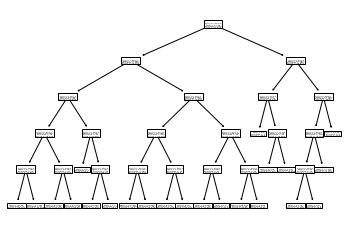

In [123]:
plot_tree(rg)

### Random Forest

![](data/RF.jpg)

Arboles de decisión.

+ Pros:

Modelos sencillos, se pueden visualizar. No necesitan preprocesar mucho los datos. Computacionalmente eficientes.

+ Contras:

Muy sensibles a pequeñas variaciones de los datos de entrada. Muy sensible a datos no balanceados. Muy dado al overfitting (poco sesgo, mucha varianza), más cuanto más profundo sea.

In [113]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [114]:
help(RFR)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_est

In [118]:
rfr  = RFR()
rfr_f = rfr.fit(X_train, y_train)
y_pred =rfr_f.predict(X_test)

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [119]:
r2_score(y_test,y_pred)

0.8756309501076177

[Text(205.76250000000002, 199.32, 'X[0] <= 416.5\nmse = 84.42\nsamples = 506\nvalue = 22.533'),
 Text(123.22500000000001, 163.07999999999998, 'X[0] <= 267.5\nmse = 70.865\nsamples = 340\nvalue = 25.416'),
 Text(60.45, 126.83999999999999, 'X[0] <= 254.5\nmse = 89.662\nsamples = 92\nvalue = 29.943'),
 Text(37.2, 90.6, 'X[0] <= 222.5\nmse = 78.832\nsamples = 76\nvalue = 28.378'),
 Text(18.6, 54.359999999999985, 'X[0] <= 190.5\nmse = 84.169\nsamples = 29\nvalue = 31.897'),
 Text(9.3, 18.119999999999976, 'mse = 16.36\nsamples = 8\nvalue = 20.762'),
 Text(27.900000000000002, 18.119999999999976, 'mse = 44.785\nsamples = 21\nvalue = 36.138'),
 Text(55.800000000000004, 54.359999999999985, 'X[0] <= 243.5\nmse = 63.184\nsamples = 47\nvalue = 26.206'),
 Text(46.5, 18.119999999999976, 'mse = 64.996\nsamples = 32\nvalue = 24.166'),
 Text(65.10000000000001, 18.119999999999976, 'mse = 31.478\nsamples = 15\nvalue = 30.56'),
 Text(83.7, 90.6, 'X[0] <= 255.5\nmse = 74.137\nsamples = 16\nvalue = 37.381'),

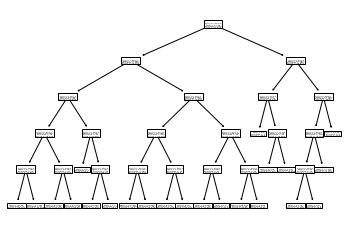

![](data/grid.png)

![](data/folds.jpg)

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
grid_param = {
    'n_estimators': [i for i in range(100, 201,10)],
    'criterion':['mse','mae'],
    'max_depth':[10,15,20,25]
}

In [126]:
grid_param

{'n_estimators': [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200],
 'criterion': ['mse', 'mae'],
 'max_depth': [10, 15, 20, 25]}

In [127]:
random_forest_regresion = RFR()
random_forest_grid = GridSearchCV(random_forest_regresion, grid_param)

In [128]:
random_trained = random_forest_grid.fit(X_train,y_train)

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\model_s

In [129]:
random_trained.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=110, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [131]:
dic_params = random_trained.best_params_

In [132]:
dic_params

{'criterion': 'mse', 'max_depth': 15, 'n_estimators': 110}

In [133]:
random_f_r_best_params = RFR(**dic_params)

In [134]:
rfr = random_f_r_best_params.fit(X_train, y_train) #Entrenamiento
y_pred = rfr.predict(X_test)
r2_score(y_pred,y_test)

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.8322267151773952

In [135]:
from sklearn.model_selection import cross_val_score

In [137]:
scores = cross_val_score(rfr, X_test,y_pred, cv = 5)
scores.mean()

0.8286073725811922

![](data/grid_search_cross_validation.png)